In [1]:
# library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# autoreload module
%load_ext autoreload
% autoreload 2

In [3]:
# import cleaner script
import cleaning_helper

In [4]:
dataframe = pd.read_csv("data/train.csv")

In [5]:
dataframe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Expected problems
    1. Cabin has NaN values. No need to fix since concluding from the Tableau analysis we know that this is not important
    2. Age has NaN values. But this is important for modelling the data. So we need to figure out a way to fill these values without disturbing the data.
    3. Embarked has two missing values. We can simply fill these with the most frequent values.

In [6]:
dataframe.drop(labels=['Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [7]:
dataframe[dataframe['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


In [8]:
cleaning_helper.fix_embarked(dataframe)

In [9]:
dataframe.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

## Working with the [Age](https://public.tableau.com/profile/gauscian#!/vizhome/tab-wkb/TitanicDataSetAnalysis?publish=yes) field
    1. Problem 1 : Want to convert the continuous to a nominal variable.
    2. Problem 2 : Remove the NaN values by replacing the values from roughly the same distribution.

![alt text](tableau-exports/AgeSurvived.png)

In [10]:
cleaning_helper.cont_discrete(dataframe, 10, 'Age')

In [11]:
dataframe.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,dis_Age
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


## Working with the [Fare](https://public.tableau.com/profile/gauscian#!/vizhome/tab-wkb/TitanicDataSetAnalysis?publish=yes) field
    1. As we know from the tableau analysis, this field has a direct impact on the number people surviving.

In [12]:
# Using the small plugin I just made for Age. Works for this too. 
cleaning_helper.cont_discrete(dataframe, 23, 'Fare')

![alt text](tableau-exports/Fare.png)

#### Cleaning up the older fields.

In [13]:
dataframe.drop(['Age', 'Fare'], inplace=True, axis=1)

In [14]:
dataframe.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Embarked,dis_Age,dis_Fare
0,0,3,"Braund, Mr. Owen Harris",male,1,0,S,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,0,0,S,2,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,S,1,2
4,0,3,"Allen, Mr. William Henry",male,0,0,S,1,0


In [15]:
# It is important to acknowledge that we do not have any more null values in our dataframe
dataframe.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Embarked    0
dis_Age     0
dis_Fare    0
dtype: int64

### Moving forward let's quickly create the nominal-string fields into nominal-integer fields 
This will enable us to use these fields for data modelling.

In [16]:
cleaning_helper.discretize_field(dataframe, 'Embarked')
cleaning_helper.discretize_field(dataframe, 'Sex')
# 0-male, 1-female, S - 0, C - 1, Q - 2

![alt text](tableau-exports/Class1SurvivedMore.png)

![alt text](tableau-exports/C'sPassengerSurviveMore.png)

![alt text](tableau-exports/FemalesSurvivedMore.png)

In [17]:
dataframe.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Embarked,dis_Age,dis_Fare,dis_Embarked,dis_Sex
0,0,3,"Braund, Mr. Owen Harris",male,1,0,S,0,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,C,1,1,1,1
2,1,3,"Heikkinen, Miss. Laina",female,0,0,S,2,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,S,1,2,0,1
4,0,3,"Allen, Mr. William Henry",male,0,0,S,1,0,0,0


In [18]:
dataframe.drop(['Embarked', 'Sex'], axis=1,inplace=True)

In [19]:
dataframe.head()

,Survived,Pclass,Name,SibSp,Parch,dis_Age,dis_Fare,dis_Embarked,dis_Sex
0,0,3,"Braund, Mr. Owen Harris",1,0,0,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1,1,1,1
2,1,3,"Heikkinen, Miss. Laina",0,0,2,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1,2,0,1
4,0,3,"Allen, Mr. William Henry",0,0,1,0,0,0


## Working with the name column.
    1. The salutations of the names can directly help for inferencing the status of the person
    2. The status of the person directly related to his Survival.

In [41]:
cleaning_helper.working_with_names(dataframe)

In [42]:
dataframe.dis_name.value_counts()

1    517
0    308
2     40
3     26
Name: dis_name, dtype: int64

In [43]:
dataframe.drop(['Name'], axis=1, inplace=True)

In [44]:
dataframe.head()

,Survived,Pclass,SibSp,Parch,dis_Age,dis_Fare,dis_Embarked,dis_Sex,dis_name
0,0,3,1,0,0,0,0,0,1
1,1,1,1,0,1,1,1,1,0
2,1,3,0,0,2,0,0,1,0
3,1,1,1,0,1,2,0,1,0
4,0,3,0,0,1,0,0,0,1


## Working with the [SibSp and Parch](https://public.tableau.com/profile/gauscian#!/vizhome/tab-wkb/TitanicDataSetAnalysis?publish=yes).
    1. People with some one are more likely to survive since they stick together

In [45]:
cleaning_helper.have_siblings_not(dataframe)

![alt text](tableau-exports/RelationshipEffect.png)

In [46]:
dataframe.head()

,Survived,Pclass,SibSp,Parch,dis_Age,dis_Fare,dis_Embarked,dis_Sex,dis_name,hasSomeOne
0,0,3,1,0,0,0,0,0,1,1
1,1,1,1,0,1,1,1,1,0,1
2,1,3,0,0,2,0,0,1,0,0
3,1,1,1,0,1,2,0,1,0,1
4,0,3,0,0,1,0,0,0,1,0


In [47]:
dataframe.drop(['SibSp','Parch'], axis=1, inplace=True)
dataframe.head()

,Survived,Pclass,dis_Age,dis_Fare,dis_Embarked,dis_Sex,dis_name,hasSomeOne
0,0,3,0,0,0,0,1,1
1,1,1,1,1,1,1,0,1
2,1,3,2,0,0,1,0,0
3,1,1,1,2,0,1,0,1
4,0,3,1,0,0,0,1,0


In [48]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived        891 non-null int64
Pclass          891 non-null int64
dis_Age         891 non-null int32
dis_Fare        891 non-null int32
dis_Embarked    891 non-null int64
dis_Sex         891 non-null int64
dis_name        891 non-null int64
hasSomeOne      891 non-null int64
dtypes: int32(2), int64(6)
memory usage: 48.8 KB


# Just before getting into modelling let us transform our test data


In [73]:
# Importing the test data
df_test = pd.read_csv("data/test.csv")

In [75]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [76]:
cleaning_helper.complete_pipeline(df_test)

In [77]:
df_test.head()

,Pclass,dis_Age,dis_Fare,dis_Embarked,dis_Sex,dis_name,hasSomeOne
0,3,0,0,0,0,1.0,0
1,3,1,0,1,1,0.0,1
2,2,2,0,0,0,1.0,0
3,3,3,0,1,0,1.0,0
4,3,4,0,1,1,0.0,1


# Modelling the Data
## At this point we can conclude that the data is now ready for making predictions

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
# instantiating the estimator - In sklearn the models are called estimators since they estimate on new data
knn = KNeighborsClassifier(n_neighbors=5)

In [54]:
X = np.array(dataframe.loc[:, dataframe.columns != 'Survived'])
y = np.array(dataframe['Survived'])

In [66]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [102]:
knn.predict(np.array(df_test))

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

### We are done building a model and predicting the values, but how do we check if it has generalized or not ?
Now comes the motivation for having a subset of the data set for which we already know that correct answers to. Hence before actually leaving the model open for production we can satisfy ourselves by the following two techniques: <br>
1. Using the training data set as the testing data set and then using its ground truth to access the performance. "Training Accuracy" - Overfitting can occur.
2. Even better we can divide the traning dataset into training and validation data set and train only on the new training portion of the dataset. "Train/Test Split"

#### 1. Training accuracy

In [104]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [107]:
y_pred = log_reg.predict(X)

In [109]:
from sklearn import metrics
metrics.accuracy_score(y, y_pred)

0.7867564534231201

In [111]:
y_pred = knn.predict(X)

In [112]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [113]:
metrics.accuracy_score(y, y_pred)

0.8484848484848485

In [115]:
# kmeans seems to perform better. But this can also be overfitting.

#### 2. Cross Validation

In [116]:
# splitting the data into train and the validation data set.
from sklearn.cross_validation import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 4)

In [121]:
# checking the dimensions of the split data.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 7), (223, 7), (668,), (223,))

In [123]:
log_reg.fit(X_train, y_train)
y_pred_test = log_reg.predict(X_test)
metrics.accuracy_score(y_test, y_pred_test)

0.7892376681614349

In [125]:
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred_test)

0.8161434977578476

It seems that KNN is performing better. Let us go further and try to seem the accuracy on different values of k

In [126]:
acc = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))


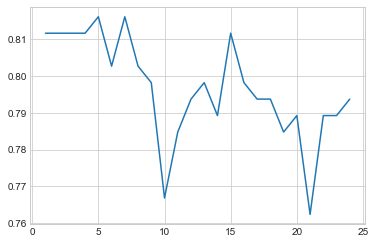

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline
sns.set_style("whitegrid")
plt.plot(list(range(1,25)), acc)

In [142]:
# So far it seems k=5 is performing the best. 
# Please note we have not tried other models so far, so keeping that into consideration let us move on.
max(acc), acc[4] # k=5

(0.8161434977578476, 0.8161434977578476)